In [5]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
#raw data를 받았어.
#머신러닝, 딥러닝 뭐든 훈련세트 꼭 만들어야 해! 자 그럼 훈련/테스트로 나눠보자

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
#훈련세트는 항시 2차원 배열이어야 한다고 했지? 이때 2차원 배열로 바꿔주는거? reshape!!!
#근데 훈련세트 중 타겟은 1차원 배열로 놔둬도 돼! 즉, train_input만 2차원 배열로 바꿔주면 돼
#근데 train_input이 2차원이면 test_input도 같이 맞춰줘야겠지? 즉, input(train, test) 둘다 2차원 배열로 바꿔줘야 해

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

#reshape 할때는 따로 객체를 지정하지 않아도 되네? 그냥 input(train, test) .reshape 하면 끝!
#kneighbors regressor 모델에 적용해볼까?

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
# 3-1에서 설정했듯이 n=3으로 모델을 더 복잡하게 만든거 그대로 넣어서 
# 실제 테스트 해보는거야! 우선 길이가 50cm인 농어의 무게를 예측해보자!
print(knr.predict([[50]]))
#길이가 50cm인 농어는 1033g이야. 근데 실제는 1500g이야. 오차가 큰데? 뭐가 문제지?

[1033.33333333]


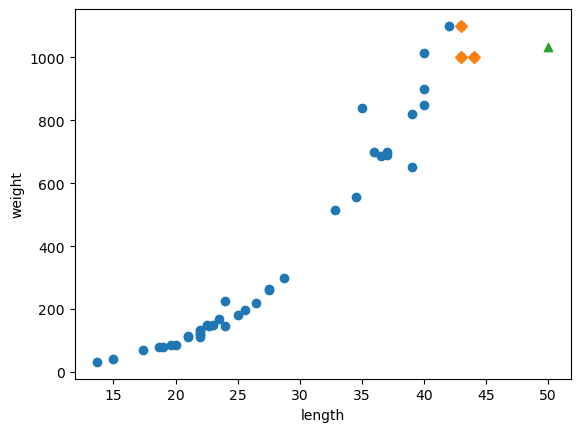

In [6]:
import matplotlib.pyplot as plt
distaneces, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이건 train값 안에 구하고자 하는 y의 값이 없으니 std curve에서 벗어난 값을 예측할 때와 비슷한 오류야. 
내가 측정하고자 하는 값이 standard에 있어야 하는데 없으니까 y(무게)를 제대로 측정하지 못하는거지
이럴땐 어떻게 해?
샘플의 수를 늘려서 더 다양한 차원에서 std를 만들었던거 기억나?

근데 머신러닝에서는 다양한 방법이 있어
1. 다른 알고리즘에 적용한다
2. 음수값 오류를 없애기 위해 2차 방정식(1특성을 제곱하여 무조건 양수로)인 다항으로 적용한다
3. 특성을 늘린다(다중!) -> 가중치 -> 규제 -> 규제의 강도 조절(alpha)

자 그럼 우린 어떻게 해볼까?
우선 다른 알고리즘인 선형회귀(y=ax+b, STD 직선)로 적용해보자

그럼 선형회귀가 뭔데?
protein assay의 std처럼 y=ax+b를 구해서 거기에 x값 대입해서 y 찾는거
근데 선형회귀가 처음에 접하기 쉽지만 하다보면 오류가 있어 
그건 해보면서 바꿔보자

In [7]:
#sklearn.linear_model 중에서 linearRegression으로 불러오자

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

#어떤 식에 대입했더니 나왔을까? y=ax +b에서 a와 b를 구해보자
# a는 기울기, b는 y절편이야
print(lr.coef_, lr.intercept_)
#기울기는 39.01714496, y절편은 -709.01864
#즉, y=39.01714496x -709.01864 
#근데 b의 값 음수야. x가 12cm이면 y값이 음수가 돼. 말이 안되지?
 

[1241.83860323]
[39.01714496] -709.0186449535477


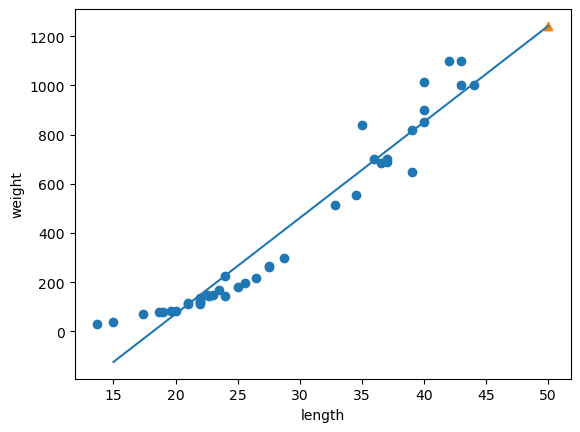

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
#plot은 직선, linearRegression에서 나온 값을 직선으로 그렸어. 농어 데이터에 맞춰서 15-50까지, 이건 내가 설정해야해
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
#훈련세트는 0.93, 테스트는 0.82 흠.. 테스트에서 0.82면 낮은 것 같은데..
#그리고 y=ax +b에서 x값이 12면 음수가 나온다고 했잖아. 샘플의 산점로를 보면 절대 음수일 수 없어. 
#그리고 직선보단 u형 curve야. 이럴땐 다항회귀를 통해 산점도처럼 u형 curve로 만들 수 있어.
#다항회귀는 2차 방정식, 제곱하여 음수가 생기지 않게 하는거야

0.939846333997604
0.8247503123313558


In [10]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
#2차항과 1차항을 합쳐서 새로운 특성 행렬을 만든거야. column_stack은 열기준으로 합쳐주는거야
#column_stack(괄호순서대로) -> (2차항, 1차항)
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278259


[]

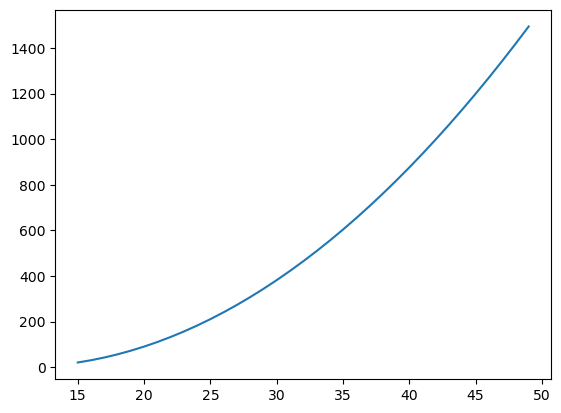

In [13]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
#다항(2차항)에 길이 50cm 대입하니까 1573g이 나왔어
#그럼 2차방정식의 계수, 절편 한번 볼까?

print(lr.coef_, lr.intercept_)
#계수 : 1.014, -21.55, 절편은 :116.05
#즉, y=1.014x^2 -21.55x +116.05

#다항식을 한번 그려볼까?

point = np.arange(15,50)
plt.plot(point, 1.014*point**2 - 21.55*point +116.05)
plt.plot()

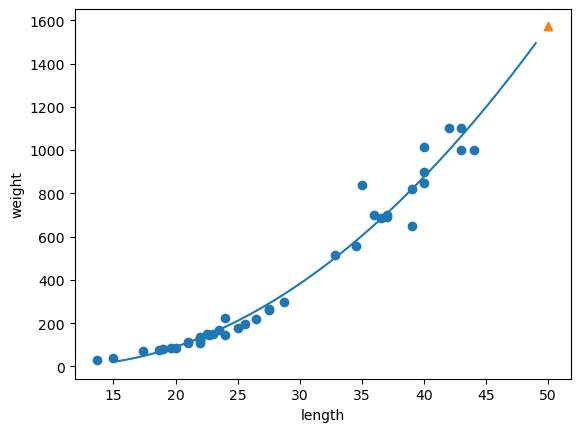

In [14]:
# 산점도랑 위 다항식을 함께 그려보자

plt.scatter(train_input, train_target)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

point = np.arange(15,50)
plt.plot(point, 1.014*point**2 - 21.55*point +116.05)
plt.show()

다항회귀(2차항) 커브랑 샘플의 산점도랑 겹친다.
잘 만들어진 것 같다.
그렇다면 R2의 값은 어떻게 되는거지? 
확인해볼까?

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# train 0.97, test 0.97 비슷하게 나왔다


0.9706807451768623
0.9775935108325121
